Project History:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
 
This dataset can be viewed as classification task. Based on features such as ages,sexes,sibling counts and embarkment points, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

Dataset: The dataset is from Kaggle


Attribute Information
Input variables :
1 - Passenger ID: Unique ID for each passenger
2 - Pclass : Denotes the class of the passenger aboard (Economy, Bussiness and First Class)
3 - Name: Name of the passenger
4 - Sex: Denotes the gender of the passenger
5 - Age :Denotes the age of the passenger.
6 - SibSp: Denotes the no. of siblings or spouses of a particular passenger
7 - Parch :Denotes the no. of parents or children of a particular passenger
8 - Ticket :Denotes the ticket ID of a particular passenger.
9 - Fare :Denotes the passenger fare in pounds
10 - Cabin :Denotes the cabin no. of the passenger. 
11 - Embarked :Denotes the embarkation port.C = Cherbourg; Q = Queenstown; S = Southampton
Output variable (based on sensory data):
12 - Survived : Whether the passenger survived the accident or not based on ‘0’= No; ‘1’= Yes

Project Objective : Understand the Dataset & cleanup (if required).
Build classification models to predict predict if an arbitrary passenger on Titanic would survive the sinking or not
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms, choose the best model with highest accuracy.

Steps to Follow for the Project: The dataset contains 12 features and 891 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# Importing the Required Library

In [169]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

# 2: Importing the Required Dataset

In [170]:
# Importing the dataset downloaded from kaggle
titanic_data=pd.read_csv('titanic_train.csv')
titanic_data.tail(15)  # displaying the last 15 records from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


# 3: Data Cleaning and Transfroming

In [171]:
titanic_data.shape # to determine the dimension of the dataset

(891, 12)

In [172]:
#Checking the dtypes of all the columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All the features are numerical except for Embarked,Cabin, Ticket, Sex  and name column

In [173]:
# Checking for missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can infer from this above that age:177, cabin:687 & embarked:2 have missing values

In [174]:
titanic_data['Embarked'].unique() # displaying the unique values for Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [175]:
titanic_data['Embarked']=titanic_data['Embarked'].replace(np.nan,'S') # replacing the null values for Embarked with S
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [176]:
# Converting Sex Column to Integer using map function
embs = {'male':0, 'female':1}
titanic_data['Sex'] = titanic_data['Sex'].map(embs)
titanic_data['Sex'].unique()

array([0, 1], dtype=int64)

In [177]:
# Converting Embarked to Integer
emb = {'S':0, 'C':1, 'Q':2}
titanic_data['Embarked'] = titanic_data['Embarked'].map(emb)
titanic_data['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [178]:
# Replacing the missing values for numerical values with mean values
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())  #  Replacing null values with mean values for numerical

In [179]:
# Replacing the missing values for non numerical objects
titanic_data.fillna(value = 0,inplace = True)  #  Replacing null values with zeroes
titanic_data.isnull().sum() # Checking if all missing values have been replaced

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [180]:
# Determine the Categorical and Numeric Values
features=titanic_data.drop('Survived',axis=1)
nu = features.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(features.shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 6 numerical & 5 categorical features.


In [181]:
cf # Displaying the categorical features

['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']

In [182]:
# Adding the SibSp to Parch to have total number of siblings
titanic_data['Siblings']=titanic_data['SibSp'] + titanic_data['Parch']

In [183]:
# drop the String Columns (Name, Ticket and Fare) and aslo SibSp and Parch since they are combined to Siblings
titanic_data.drop(['Name', 'Ticket', 'Cabin','SibSp','Parch'], axis=1, inplace=True)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Siblings
0,1,0,3,0,22.0,7.2500,0,1
1,2,1,1,1,38.0,71.2833,1,1
2,3,1,3,1,26.0,7.9250,0,0
3,4,1,1,1,35.0,53.1000,0,1
4,5,0,3,0,35.0,8.0500,0,0


In [184]:
# Checking for duplicate values
titanic_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [185]:
# displaying the number of duplicated values in the dataset
titanic_data[titanic_data.duplicated()==True].shape[0]

0

We can infer that there is no duplicated value in our dataset

In [186]:
titanic_data.describe() # Performing Descriptive Statistical Analysis on the  Features

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Siblings
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,32.204208,0.361392,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.002015,49.693429,0.635673,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


We can infer from the statistics that there is no missing data since the count of each feature is 891. There seem to be very few or no outliers present as there not much difference in the interquartile ranges.

# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

# 4.1Univarite Analysis

In [187]:
# Determine the unique values for each region
Survival_rate = titanic_data["Survived"].value_counts()
Survival_rate

0    549
1    342
Name: Survived, dtype: int64

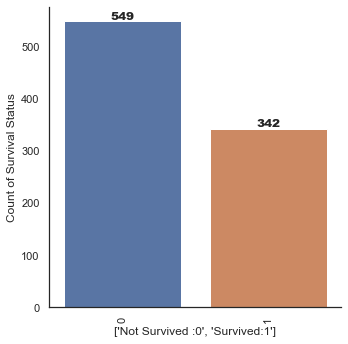

In [188]:
labels = ['Not Survived :0','Survived:1']
sns.catplot(x = 'Survived', data = titanic_data , kind = 'count',margin_titles =False) # plotting the survival rate
#add value labels to the bar chat
#Status = list(Survival_rate.keys())
for index,value in enumerate(titanic_data["Survived"].value_counts()):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    plt.xlabel(labels)
    plt.ylabel("Count of Survival Status")
    #plt.bar(Status,Width = 0.5)
    plt.xticks(rotation = 90)

                           Target Variable Distribution                          


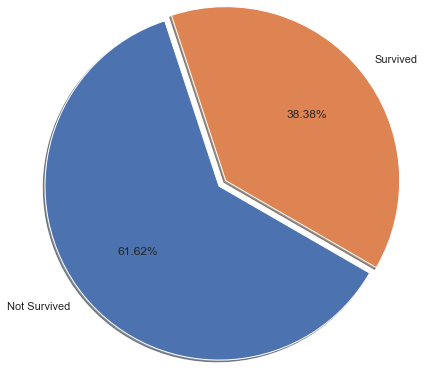

In [189]:
labels = ['Not Survived','Survived']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mTarget Variable Distribution'.center(85))
plt.pie(titanic_data['Survived'].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

In [190]:
titanic_data["Sex"].unique()

array([0, 1], dtype=int64)

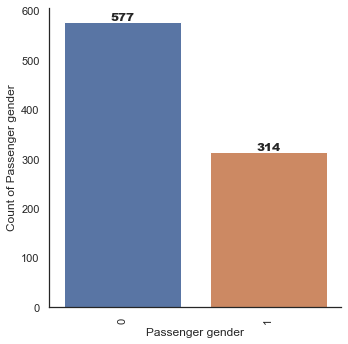

In [191]:
#no of males and females on the titanic 
sns.set(style="white")
sns.catplot(x = 'Sex', data = titanic_data , kind = 'count',margin_titles =False)
for index,value in enumerate(titanic_data["Sex"].value_counts()):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")
    plt.xlabel("Passenger gender")
    plt.ylabel("Count of Passenger gender")
    #plt.bar(Status,Width = 0.5)
    plt.xticks(rotation = 90)

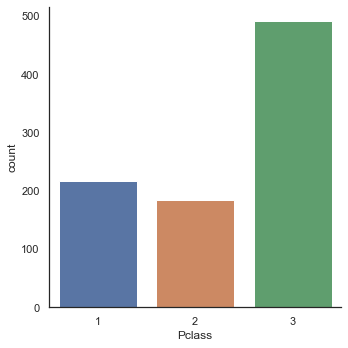

In [192]:
#no of Pclass on the titanic 
sns.set(style="white")
sns.catplot(x = 'Pclass', data = titanic_data , kind = 'count',margin_titles =False)

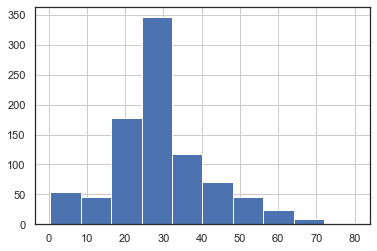

In [193]:
# Diffirent age categories for the titanic passengers
hist = titanic_data['Age'].hist(bins=10)

Inference from our Univarite Analysis:
    We have more 61.62% people not surviving the titanic, almost double the % of people that survive the titanic (38.38%)
    We have more male (577) than the female on the sink (314)
    We have more passengers on 3rd class and less passengers on the second class
    Most of the passengers on the boat are between 20 -40 years of age

# 4.2 Bivarite Analysis

In [194]:
# function to Visualizing Categorical values using Box plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['Pclass','Sex', 'Age','Siblings','Embarked']
    sns.countplot(x=Categorical_column,hue='Survived', data=titanic_data)
    plt.title(f"{Categorical_column.title()} vsSurvival rate",fontweight="black",size=25,pad=10,)
    plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
    col_values = titanic_data[Categorical_column].value_counts()
    plt.tight_layout()

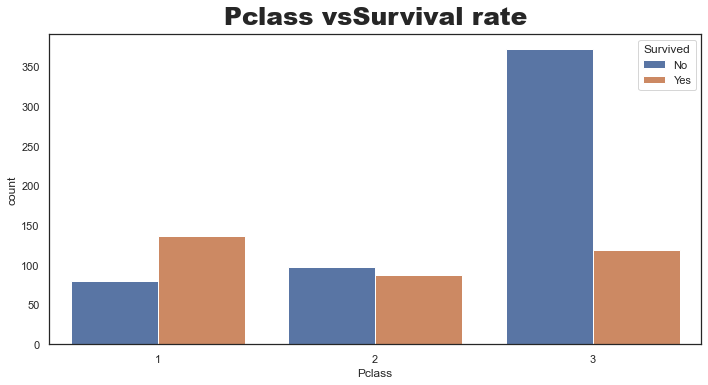

In [195]:
features_plot("Pclass") # Calling function features_plot to plot Pclass against the Survival rate

We can infer that people in the 3rd cabin died more  in the ship collapse 
also more people in the 1st cabin survived the ship accident

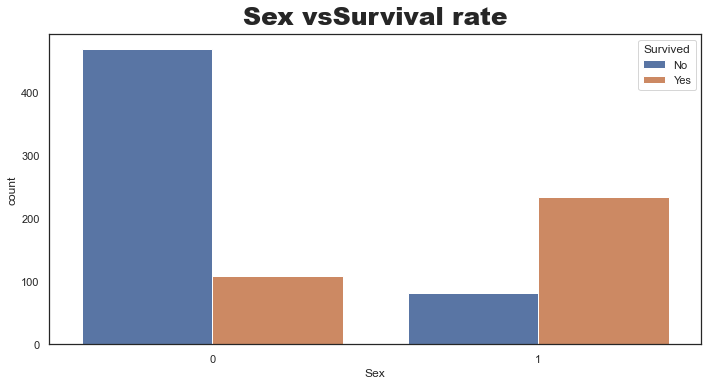

In [196]:
features_plot("Sex") # Calling function features_plot to plot the Gender against the Survival rate

We can infer that people more male died in the  ship collapse 
More female survided in the ship accident

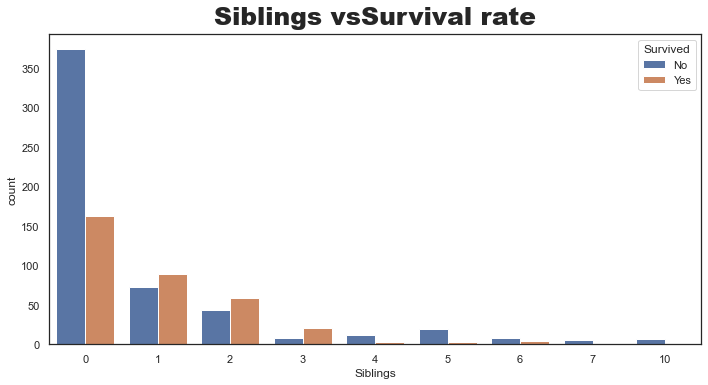

In [197]:
features_plot("Siblings") # Calling function features_plot to plot the Siblings against the Survival rate

We can infer that people with 0 to 2 siblings died more in the accident

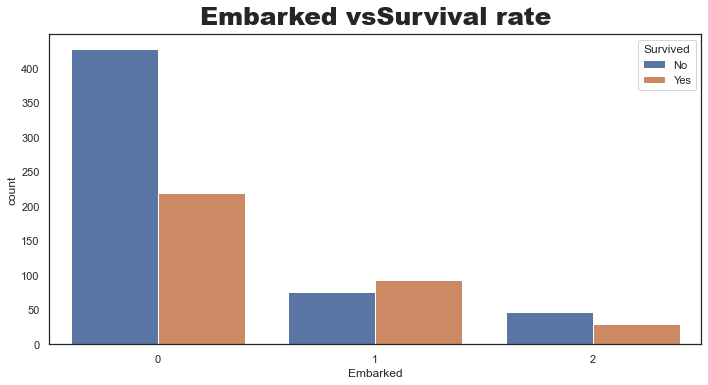

In [198]:
features_plot("Embarked") # Calling function features_plot to plot the Embarked against the Survival rate

We can infer that people that are embarked from  Southampton died more than other places 
Also less people embarked from Queenstown and also less people died from Queenstown

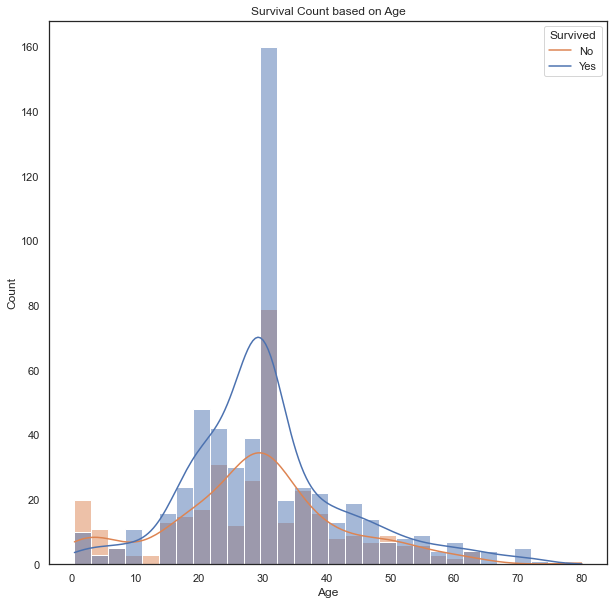

In [199]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(10, 10))
sns.histplot(x='Age', hue='Survived', data=titanic_data, kde=True)
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 4.3  Multivarite Analyses

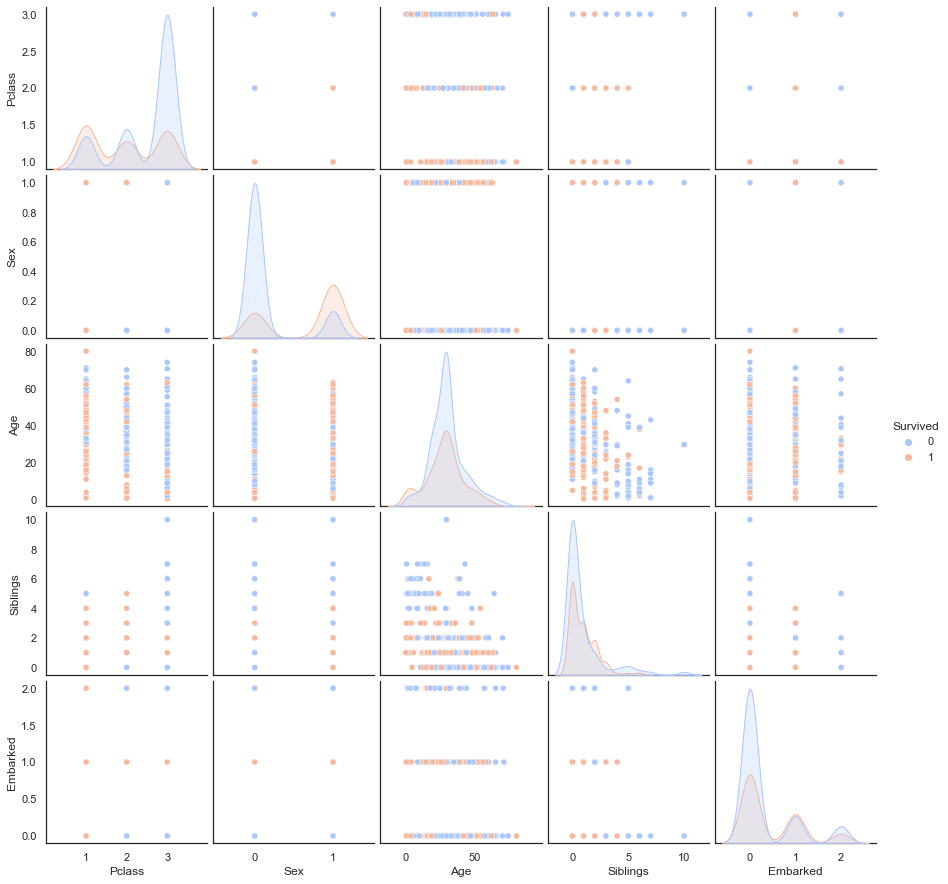

In [200]:
#Pairplot of all numerical variables
sns.pairplot(titanic_data, vars=['Pclass','Sex', 'Age','Siblings','Embarked'],hue='Survived',palette="coolwarm")
plt.show()

Pairplot show that our target feature(Survived) shows positive linear correlation with almost all features like Pclass(Passenger Class), sex, age,Siblings and Embarked)except for a few which show no correlation

# 5: Feature Selection/Extraction- to identify the most relevant features

C:\Users\ayoba\AppData\Local\Temp\ipykernel_27992\273585746.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)


<AxesSubplot:>

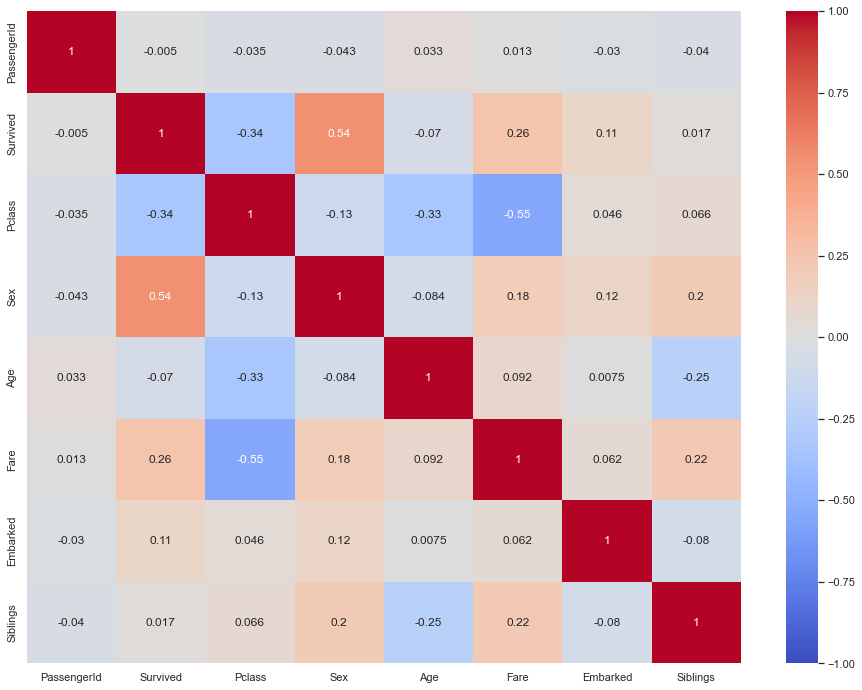

In [201]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=titanic_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Survived show a strong correlation with Sex,Pclass,Age and Siblings

# 6: Data Preprocessing

In [371]:
# Separating feature data and Label data
X = titanic_data.drop(['Survived','Fare'],axis=1) # drop column charges
y = titanic_data['Survived']
X

,PassengerId,Pclass,Sex,Age,Embarked,Siblings
0,1,3,0,22.000000,0,1
1,2,1,1,38.000000,1,1
2,3,3,1,26.000000,0,0
3,4,1,1,35.000000,0,1
4,5,3,0,35.000000,0,0
...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0
887,888,1,1,19.000000,0,0
888,889,3,1,29.699118,0,3
889,890,1,0,26.000000,1,0


In [406]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [407]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler # importing the library for standard scaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X_train) # Standardise the training data
X_new=pd.DataFrame(X_Scalar,columns=X_train.columns)  # Converting the standardised variable to Dataframe
X_new.head(10)

,PassengerId,Pclass,Sex,Age,Embarked,Siblings
0,-0.453066,-1.614136,-0.724310,1.229207,-0.548035,-0.554666
1,1.113874,-0.400551,-0.724310,-0.503505,-0.548035,-0.554666
2,-0.254275,0.813034,-0.724310,0.189580,-0.548035,-0.554666
3,1.000836,0.813034,-0.724310,-0.272477,-0.548035,0.040096
4,1.425702,0.813034,1.380624,-1.812666,-0.548035,3.013909
5,-1.283310,-1.614136,-0.724310,-0.426496,1.044622,0.040096
6,0.345995,-1.614136,-0.724310,1.190703,-0.548035,-0.554666
7,-0.336130,-0.400551,-0.724310,-0.041448,1.044622,0.040096
8,-1.630219,0.813034,-0.724310,0.012390,-0.548035,-0.554666
9,-1.528875,-1.614136,-0.724310,0.012390,-0.548035,-0.554666


# 7: Predictive Modelling using various algorithms

# Logistic Regression

In [408]:
# train a logistic regression model on the training set
Titanic_lreg = LogisticRegression(solver='liblinear')
Titanic_lreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [409]:
# Predicting the data model
Titanic_survival_pred = Titanic_lreg.predict(X_test) # Predicting the model
Titanic_survival_pred.shape

(179,)

In [410]:
print ('Accuracy Score :', accuracy_score(y_test, Titanic_survival_pred)*100)

Accuracy Score : 79.88826815642457


In [411]:
#Accuracy and various Metrics for the model
LR_testing=round(accuracy_score(y_test, Titanic_survival_pred)*100,2)
LR_mae=mean_absolute_error(Titanic_survival_pred,y_test)
LR_mse=mean_squared_error(Titanic_survival_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(Titanic_survival_pred,y_test))
LR_r2=r2_score(y_test,Titanic_survival_pred)
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.2011173184357542
Mean squared error  => 0.2011173184357542
Root Mean squared error  => 0.4484610556511615
R2 Score  => 0.17065637065637063
Accuracy Score of Testing Data is => 79.89


In [412]:
# Classification Report
print(classification_report(y_test,Titanic_survival_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Random Forest Classifier

In [413]:
clf = RandomForestClassifier(n_estimators = 1200, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18)

In [416]:
clf.fit(X_train, y_train.ravel()) # Fitting the model

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=1200,
                       random_state=18)

In [417]:
clf_pred = clf.predict(X_test) # Predicting the model
clf_pred.shape

(179,)

In [418]:
#Accuracy and various Metrics for the model
clf_testing=round(accuracy_score(y_test, clf_pred)*100,2)
clf_mae=mean_absolute_error(clf_pred,y_test)
clf_mse=mean_squared_error(clf_pred,y_test)
clf_rmse=np.sqrt(mean_squared_error(clf_pred,y_test))
clf_r2=r2_score(y_test,clf_pred)
print('Mean absolute error  =>',clf_mae)
print('Mean squared error  =>',clf_mse)
print('Root Mean squared error  =>',clf_rmse)
print('R2 Score  =>',clf_r2)
print("Accuracy Score of Testing Data is =>",clf_testing)

Mean absolute error  => 0.17318435754189945
Mean squared error  => 0.17318435754189945
Root Mean squared error  => 0.41615424729527806
R2 Score  => 0.28584298584298584
Accuracy Score of Testing Data is => 82.68


In [419]:
# Classification Report
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [454]:
features

,Feature Name,Importance
2,Sex,0.288103
0,PassengerId,0.267390
3,Age,0.221175
1,Pclass,0.110141
5,Siblings,0.080185
4,Embarked,0.033006


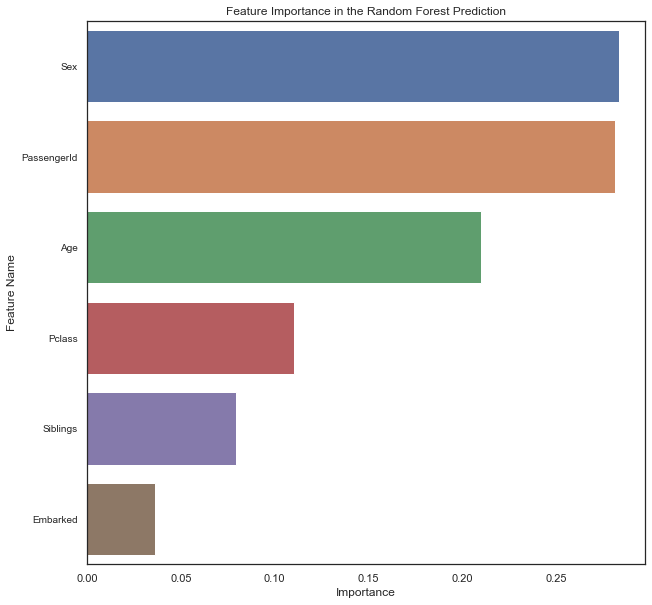

In [420]:
imp_df = pd.DataFrame({"Feature Name":X_new.columns,"Importance":clf.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Random Forest Prediction")
plt.yticks(size=10)
plt.show()

# K-nearest Neighbour Model

In [424]:
# Instantiate the model with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=6,metric='manhattan') # create instance of K-neighbor classifier
knn_model=knn.fit(X_train,y_train) #  Training the model 

In [425]:
y_pred_k=knn.predict(X_test) # predicting using the model
y_pred_k.shape

(179,)

In [426]:
#Accuracy and various Metrics for the model
knn_testing=round(accuracy_score(y_test, y_pred_k)*100,2)
knn_mae=mean_absolute_error(y_pred_k,y_test)
knn_mse=mean_squared_error(y_pred_k,y_test)
knn_rmse=np.sqrt(mean_squared_error(y_pred_k,y_test))
knn_r2=r2_score(y_test,y_pred_k)
print('Mean absolute error  =>',knn_mae)
print('Mean squared error  =>',knn_mse)
print('Root Mean squared error  =>',knn_rmse)
print('R2 Score  =>',knn_r2)
print("Accuracy Score of Testing Data is =>",knn_testing)

Mean absolute error  => 0.4301675977653631
Mean squared error  => 0.4301675977653631
Root Mean squared error  => 0.6558716320785365
R2 Score  => -0.773873873873874
Accuracy Score of Testing Data is => 56.98


In [427]:
# Classification Report
print(classification_report(y_test,y_pred_k))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71       105
           1       0.43      0.12      0.19        74

    accuracy                           0.57       179
   macro avg       0.51      0.50      0.45       179
weighted avg       0.52      0.57      0.49       179



# Decision Tree Classifier

In [284]:
# Fit model on the Daatset
DT=tree.DecisionTreeClassifier(criterion='entropy',max_depth=9, max_features='sqrt',min_samples_leaf=7, random_state=42, splitter='random')

In [428]:
DT.fit(X_train,y_train) # Fit model on the Daatset
DT_pred=DT.predict(X_test) # Predicting the model
DT_pred.shape

(179,)

In [429]:
#Accuracy and various Metrics for the model
DT_testing=round(accuracy_score(y_test, DT_pred)*100,2)
DT_mae=mean_absolute_error(DT_pred,y_test)
DT_mse=mean_squared_error(DT_pred,y_test)
DT_rmse=np.sqrt(mean_squared_error(DT_pred,y_test))
DT_r2=r2_score(y_test,DT_pred)
print('Mean absolute error  =>',DT_mae)
print('Mean squared error  =>',DT_mse)
print('Root Mean squared error  =>',DT_rmse)
print('R2 Score  =>',DT_r2)
print("Accuracy Score of Testing Data is =>",DT_testing)

Mean absolute error  => 0.20670391061452514
Mean squared error  => 0.20670391061452514
Root Mean squared error  => 0.454647017602145
R2 Score  => 0.14761904761904754
Accuracy Score of Testing Data is => 79.33


In [430]:
# Classification Report
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



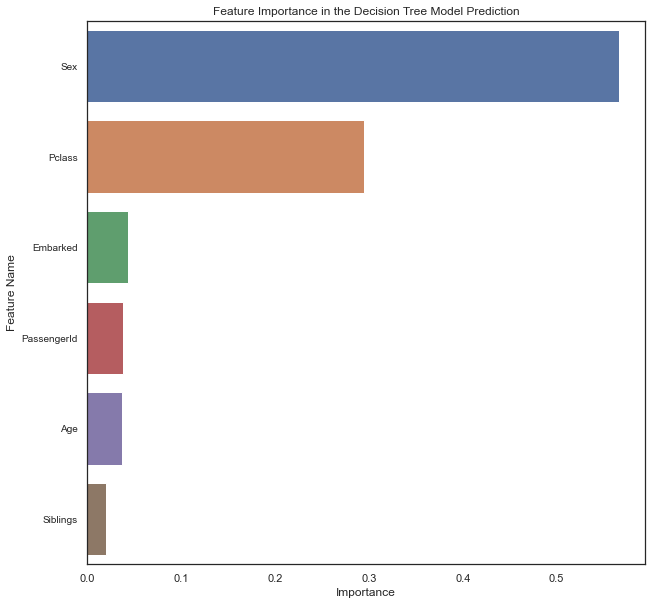

In [431]:
imp_df = pd.DataFrame({"Feature Name":X_new.columns,"Importance":DT.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

# Extra Tree Classifier

In [432]:
# Using ExtraTrees Classifier
et =ExtraTreesClassifier(n_estimators=100) 
et.fit(X_train,y_train)
et_pred=et.predict(X_test)
et_pred.shape

(179,)

In [433]:
#Accuracy and various Metrics for the model
et_testing=round(accuracy_score(y_test, et_pred)*100,2)
et_mae=mean_absolute_error(et_pred,y_test)
et_mse=mean_squared_error(et_pred,y_test)
et_rmse=np.sqrt(mean_squared_error(et_pred,y_test))
et_r2=r2_score(y_test,et_pred)
print('Mean absolute error  =>',et_mae)
print('Mean squared error  =>',et_mse)
print('Root Mean squared error  =>',et_rmse)
print('R2 Score  =>',et_r2)
print("Accuracy Score of Testing Data is =>",et_testing)

Mean absolute error  => 0.2011173184357542
Mean squared error  => 0.2011173184357542
Root Mean squared error  => 0.4484610556511615
R2 Score  => 0.17065637065637063
Accuracy Score of Testing Data is => 79.89


In [434]:
# Classification Report
print(classification_report(y_test,et_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



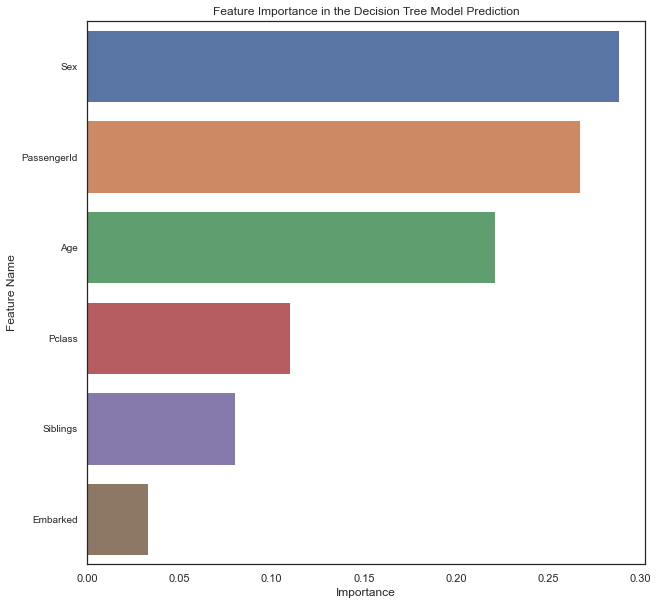

In [435]:
imp_df = pd.DataFrame({"Feature Name":X_new.columns,"Importance":et.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x="Importance", y="Feature Name", data=features)
plt.title("Feature Importance in the Decision Tree Model Prediction")
plt.yticks(size=10)
plt.show()

# Bagging Classifier

In [436]:
# Using Bagging Classifier
bmc = BaggingClassifier(KNeighborsClassifier())
bmc.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier())

In [437]:
bmc_pred=bmc.predict(X_test)
bmc_pred.shape

(179,)

In [438]:
#Accuracy and various Metrics for the model
bmc_testing=round(accuracy_score(y_test, bmc_pred)*100,2)
bmc_mae=mean_absolute_error(bmc_pred,y_test)
bmc_mse=mean_squared_error(bmc_pred,y_test)
bmc_rmse=np.sqrt(mean_squared_error(bmc_pred,y_test))
bmc_r2=r2_score(y_test,et_pred)
print('Mean absolute error  =>',bmc_mae)
print('Mean squared error  =>',bmc_mse)
print('Root Mean squared error  =>',bmc_rmse)
print('R2 Score  =>',bmc_r2)
print("Accuracy Score of Testing Data is =>",bmc_testing)

Mean absolute error  => 0.46368715083798884
Mean squared error  => 0.46368715083798884
Root Mean squared error  => 0.680945776723807
R2 Score  => 0.17065637065637063
Accuracy Score of Testing Data is => 53.63


In [439]:
# Classification Report
print(classification_report(y_test,bmc_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66       105
           1       0.38      0.19      0.25        74

    accuracy                           0.54       179
   macro avg       0.48      0.49      0.46       179
weighted avg       0.50      0.54      0.49       179



# 8: Comparing the models and Model Evaluation

In [440]:
# Create instances of all four classifier
logc = LogisticRegression()
dtc = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=6)
bmc = BaggingClassifier(KNeighborsClassifier())
et =ExtraTreesClassifier(n_estimators=100)
clfc = RandomForestClassifier(n_estimators = 1200)

In [441]:
for clf in (logc, dtc,knn,bmc,et,clfc):
    clf.fit(X_train, y_train)
    VC_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,VC_pred)) 

C:\Users\ayoba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8212290502793296
DecisionTreeClassifier 0.7597765363128491
KNeighborsClassifier 0.5921787709497207
BaggingClassifier 0.49162011173184356
ExtraTreesClassifier 0.8156424581005587
RandomForestClassifier 0.8268156424581006


In [460]:
# Results
models_metrics = pd.DataFrame([
    ["Logistic Regression Model", LR_testing, LR_mse],
    ["Decison tree Classifier",DT_testing, DT_mse],
    ["K-neighbour Classifier", knn_testing, knn_mse],
    ["bagging Tree Classifier", bmc_testing, bmc_mse],
    ["Random Forest Classifier", clf_testing, clf_mse],
    ["Extra Tree Classifier", et_testing, et_mse]
])
models_metrics.columns= ["Model","Accuracy","MSE"]
models_metrics.set_index("Model")
models_metrics

,Model,Accuracy,MSE
0,Logistic Regression Model,79.89,0.201117
1,Decison tree Classifier,79.33,0.206704
2,K-neighbour Classifier,56.98,0.430168
3,bagging Tree Classifier,53.63,0.463687
4,Random Forest Classifier,82.68,0.173184
5,Extra Tree Classifier,79.89,0.201117


In [461]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',fontweight="black",fontsize='22')

C:\Users\ayoba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


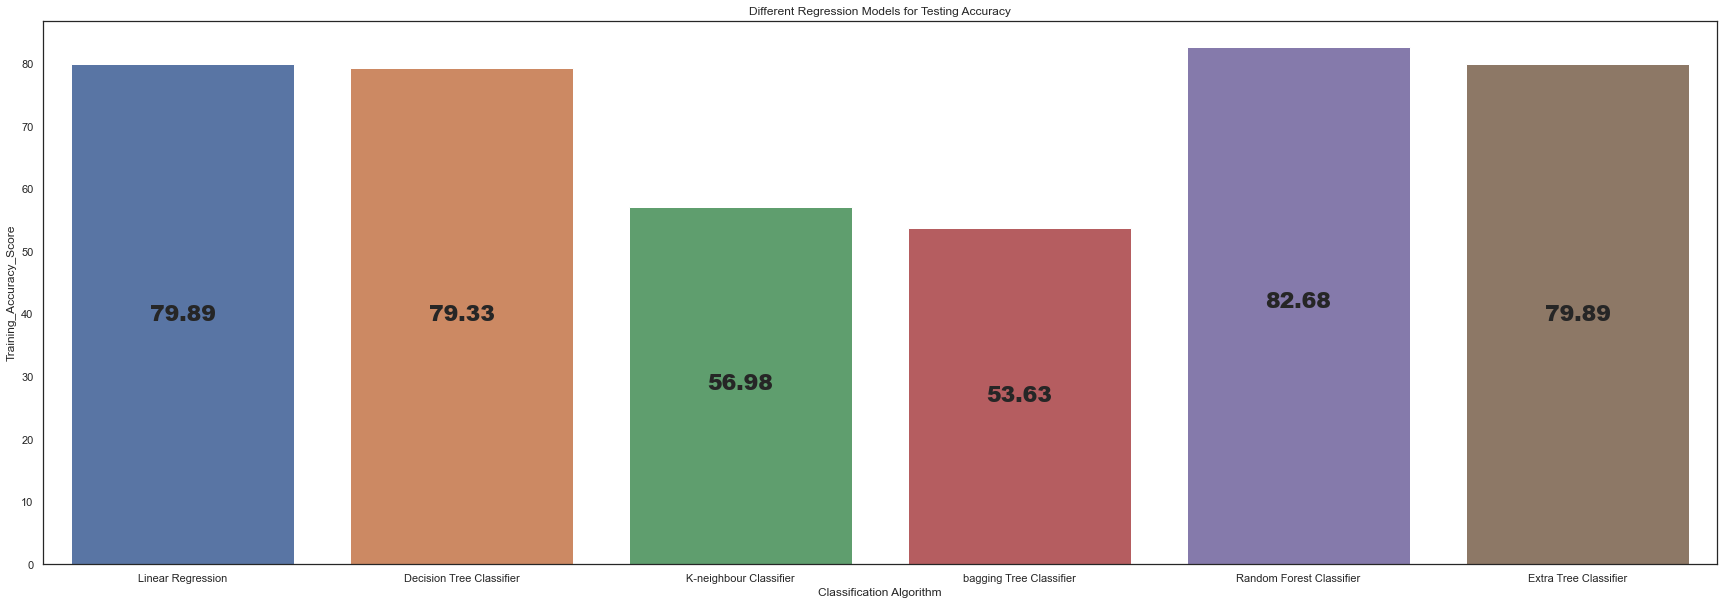

In [462]:
# Creating a bar plot
x= ['Linear Regression','Decision Tree Classifier','K-neighbour Classifier','bagging Tree Classifier','Random Forest Classifier','Extra Tree Classifier']
y= [LR_testing,DT_testing,knn_testing,bmc_testing,clf_testing,et_testing]
plt.figure(figsize = (30,10))
sns.barplot(x,y)

# calling the function to add value labels
addlabels(x, y)

# Add labels to your graph
plt.xlabel('Classification Algorithm')
plt.ylabel('Training_Accuracy_Score')
plt.title("Different Regression Models for Testing Accuracy")

#plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for Decision Tree

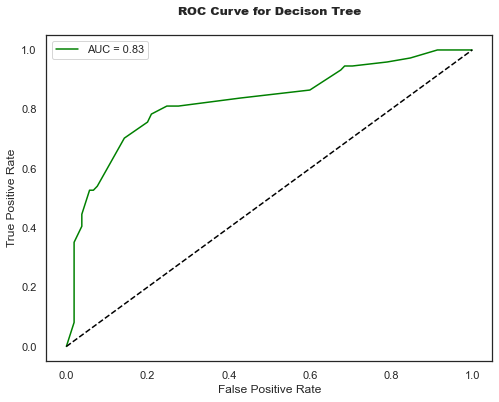

In [463]:
y_pred_proba = DT.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decison Tree",pad=20,fontweight="black")
plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for Rain Forest Classifier

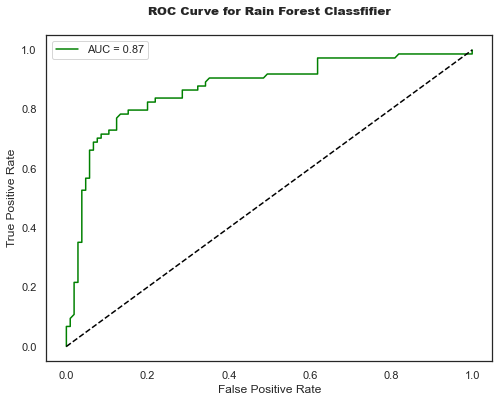

In [464]:
y_pred_proba = clf.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Rain Forest Classfifier",pad=20,fontweight="black")
plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for KNN

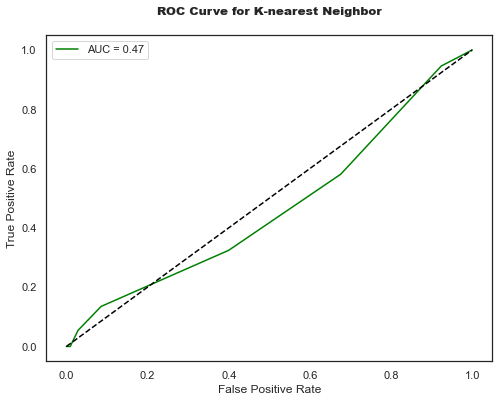

In [465]:
y_pred_proba = knn.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for K-nearest Neighbor",pad=20,fontweight="black")
plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for Bagging Tree Classifier

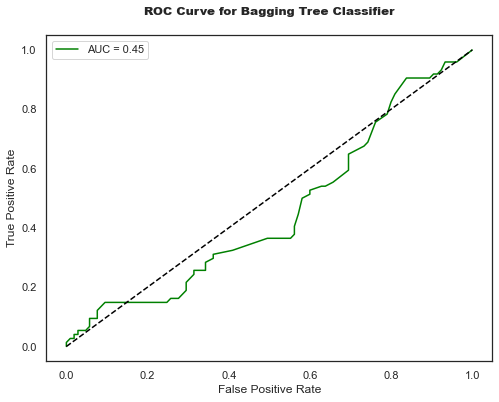

In [466]:
y_pred_proba = bmc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Bagging Tree Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

ROC Curve and Area Under the Curve (AUC) for Extra Tree Classifier

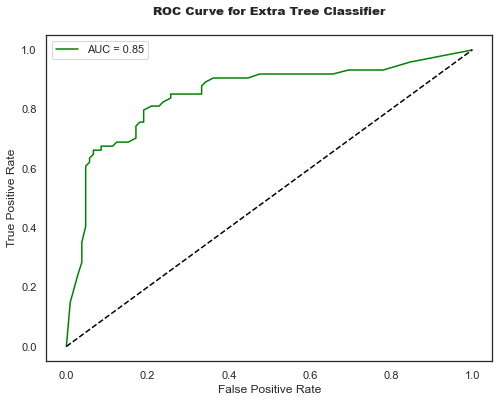

In [467]:
y_pred_proba = et.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Extra Tree Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

# 9: Project Outcomes & Conclusion

In [468]:
# We are going to use the prediction of extra tree classifier since it is the one with the best accuracy
list_of_features = features
#output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': clf_pred})
output=pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived':clf_pred})
output.to_csv('submission.csv', index=False)

In [469]:
# Retrieving the predicted values
predicted_data=pd.read_csv('submission.csv')
predicted_data

,PassengerId,Survived
0,710,0
1,440,0
2,841,0
3,721,1
4,40,0
...,...,...
174,434,0
175,774,0
176,26,0
177,85,1


The Exploratory Data and predictive analysis provided valuable insights into the factors that contribute to the sinking of the ship across the  continents. We can infere that there is a strong positive correlations between Sex, Age, Siblings (Parch + SibSp), Fare and Embarked, indicating that these factors are important in deciding survival of people inside the boat.
Out of the  models used for the evaluation, Logistic regression, Decision tree Classifer, random Forest classifier and Extra tree classifier achieved an average score near to 75% on the training data and alos AOC value of 85%  indicating a good fit to the training instances. 
We can see from the models used, Logistic Regression, Random Forest classifier,Decision Tree and Extra tree classifier model, all of the models perfom better while predicting the survival rate  but tK neighbour and bagging tree did not performed very well.
